In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth,
# followed by the flatten and multiple dense layers

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)             

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


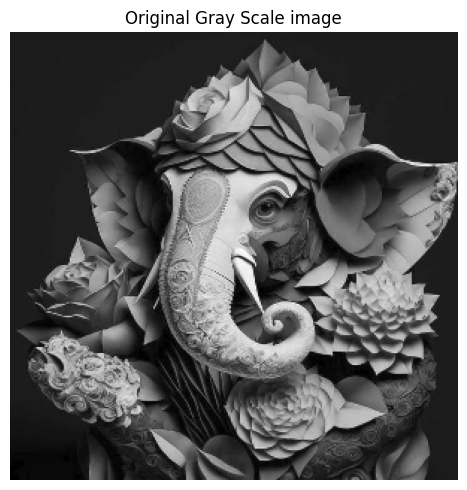

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

image = tf.io.read_file('/content/drive/MyDrive/Ganesh.jpg')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image');
plt.show();

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

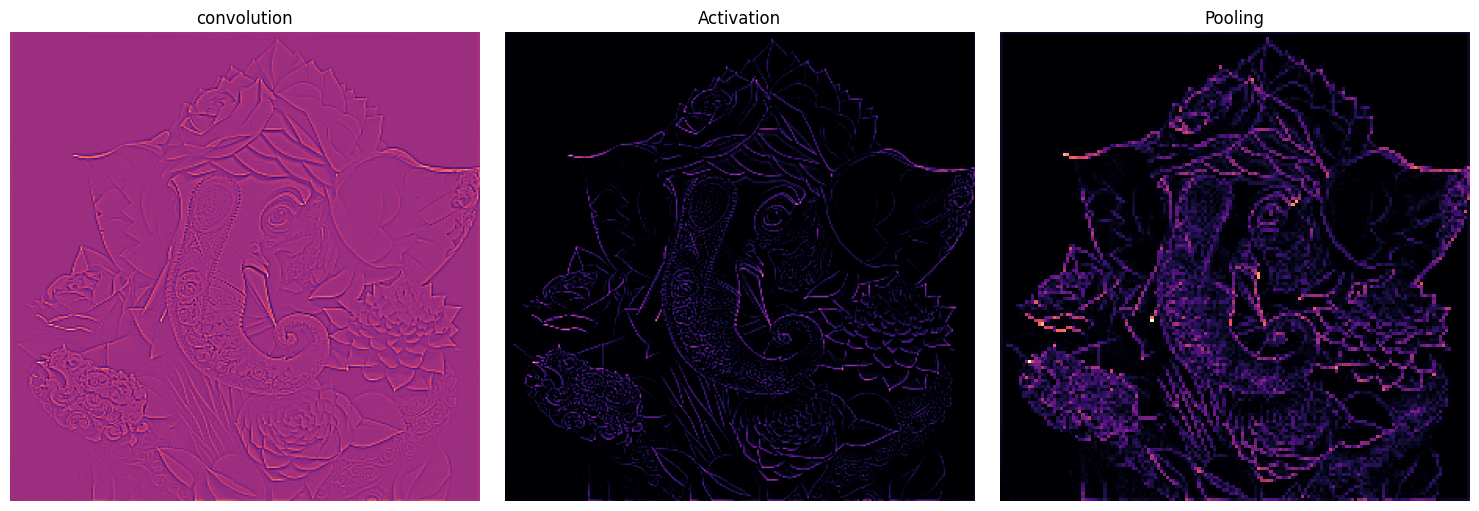

In [ ]:
conv_fn=tf.nn.conv2d
image_filter = conv_fn(input=image,filters=kernel,strides=1,padding='SAME',)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('convolution')
relu_fn=tf.nn.relu
image_detect=relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')
pool = tf.nn.pool
image_condense = pool(input=image_detect,window_shape=(2,2),pooling_type='MAX',strides=(2,2),padding='SAME',)
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

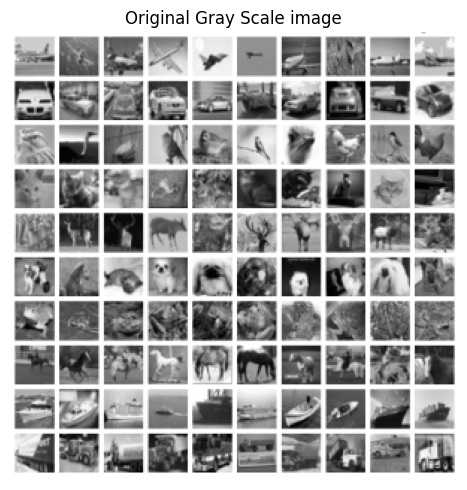

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

image = tf.io.read_file('/content/drive/MyDrive/cifar-10.png')
image = tf.io.decode_jpeg(image,channels=1)
image = tf.image.resize(image,size=[300,300])

img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image');
plt.show();